# Customer Churn Analysis

Project Description:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn
because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads 
through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a 
higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to 
prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build 
churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on 
that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching 
services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn 
prediction models. 

Dataset Link-  
•	https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.shape

(7043, 21)

Rows - 7043 & columns - 21 in the dataset.

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


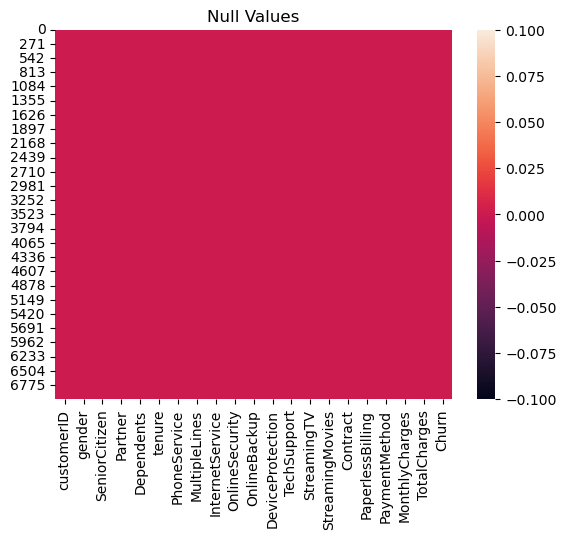

In [10]:
# using heatmap :

sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [11]:
# Checking the Datatypes of the columns:

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can observe that['TotalCharges'] column has a continous data but it is an object type. Let us handled this column

In [12]:
# It will convert object to float first we check the unique value of TotalCharges column:
# and result shows array of the unique value ..

df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
# it will count of number of unique value ..

df['TotalCharges']. nunique()

6531

In [14]:
# Similarly i check the unique value of other columns ...

df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
# Checking the number of rows : 

df.shape[0]

7043

In [16]:
# check the white spaces value, using loc method :
# It will give the index value and result of TotalCharges column are showing blank .

df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
# using the replace value ..

df['TotalCharges']=df['TotalCharges'].replace(" ", np.nan)

In [18]:
# after replacing checking the null values ...

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
# converting the columns Object type to flaot type using the astype method..

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [20]:
df.TotalCharges.dtype

dtype('float64')

Now, We can see the ['totalCharges'] column has some spaces values which is replaced by NaN value. Now , we will handle the 
Nan Value

Handlng, The NaN value and replacing it with the mean of the column. As the column is continous in nature

In [21]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [22]:
df.loc[488, :]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [23]:
# simillary check the other row 

df.loc[753, :]

customerID                   3115-CZMZD
gender                             Male
SeniorCitizen                         0
Partner                              No
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    20.25
TotalCharges                        NaN
Churn                                No
Name: 753, dtype: object

After checked both row main things the TotalCharges are Showing NaN value

In [24]:
# Right Now, I am fill the Null value and using the Fillna Method...

df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [25]:
df.loc[753, :]

customerID                   3115-CZMZD
gender                             Male
SeniorCitizen                         0
Partner                              No
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    20.25
TotalCharges                2283.300441
Churn                                No
Name: 753, dtype: object

Now , It showing the TotalCharges column is a mean value .

In [26]:
df.loc[488, :]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [27]:
df.loc[6754, :]

customerID                         2775-SEFEE
gender                                   Male
SeniorCitizen                               0
Partner                                    No
Dependents                                Yes
tenure                                      0
PhoneService                              Yes
MultipleLines                             Yes
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                           No
TechSupport                               Yes
StreamingTV                                No
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           61.9
TotalCharges                      2283.300441
Churn                                      No
Name: 6754, dtype: object

The Cross checking of TotaCharges column are same 

In [28]:
# Now, again check the null value ..

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now , We observe our TotalCharges column convert object to float value .

EDA - Expolatory Data Analysis and Data Visualization :

In [30]:
# Now, Making the Dataframe of the Nominal Data :

df_visualization_nominal = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                               'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                               'Churn'].copy()]

In [31]:
df_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Data Visualization :

For the nominal categorical Data we will use countplot as it will give the frequency of the classes of the column

In [32]:
import seaborn as sns

Male      3555
Female    3488
Name: gender, dtype: int64


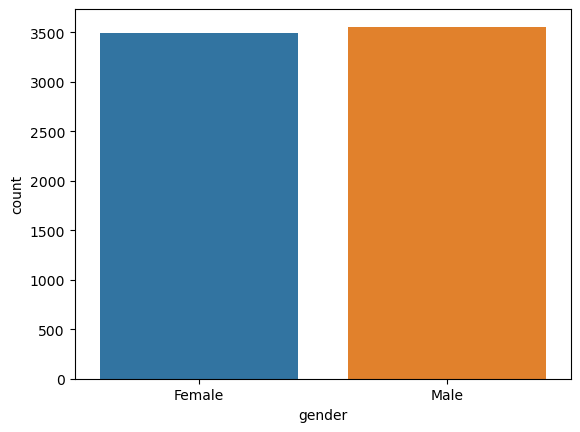

In [33]:
ax = sns.countplot (x = 'gender', data = df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

for the observation is Total number of Male is 3555 and Total number of Female is 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


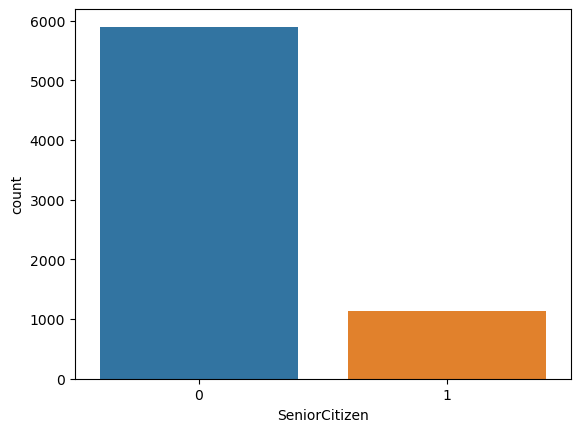

In [34]:
ax = sns.countplot (x = 'SeniorCitizen', data = df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

The total number of Younger customer is 5901 and total number of SeniorCitizen customer is 1142

No     3641
Yes    3402
Name: Partner, dtype: int64


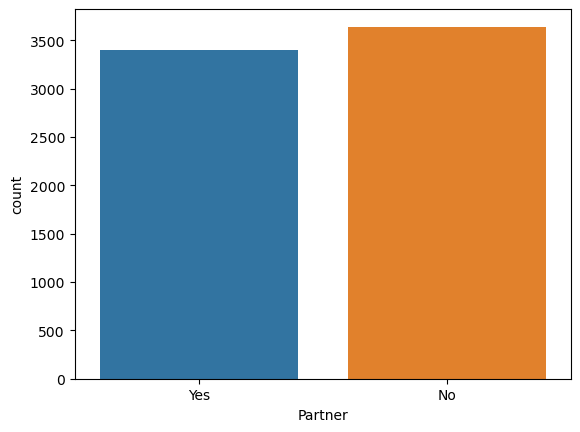

In [35]:
ax = sns.countplot (x = 'Partner', data = df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

for observation married couple is 3402 and unmarried is 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64


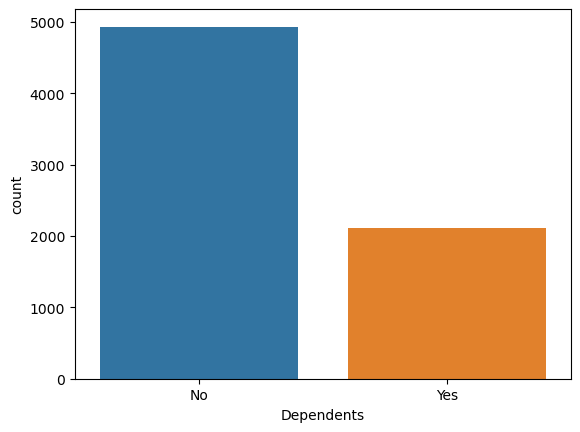

In [36]:
ax = sns.countplot (x = 'Dependents', data = df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

Total number of Dependent customer is 2110 and independent customers is 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


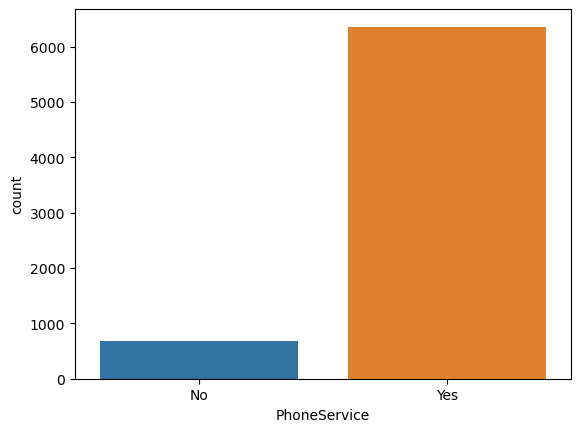

In [37]:
ax = sns.countplot (x = 'PhoneService', data = df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

Total number of customer using Phone services is 6361 and total number of customer is not using phone service is 682

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


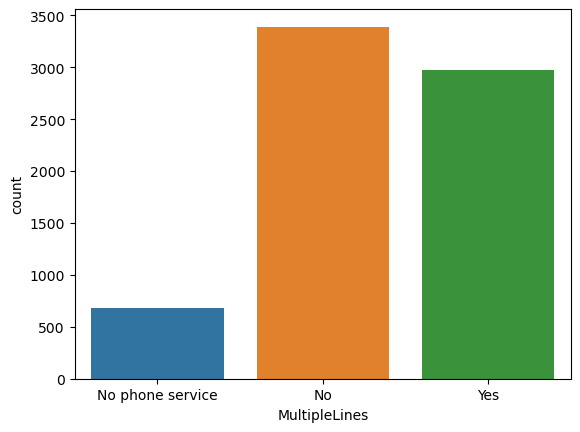

In [38]:
ax = sns.countplot (x = 'MultipleLines', data = df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

The total number of customer no phone srvices is 682 and using no multiplelines is 3390 and using multiple line is 2971

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


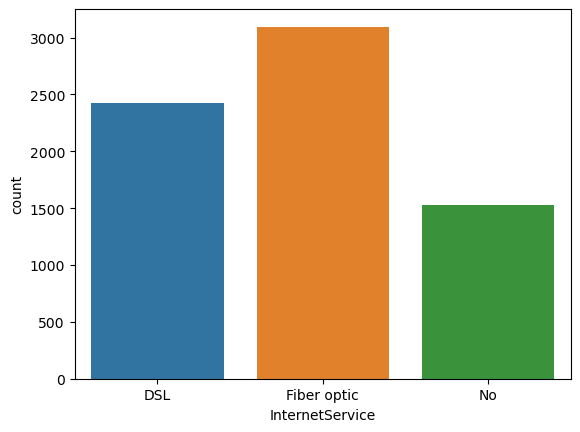

In [39]:
ax = sns.countplot (x = 'InternetService', data = df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

Total number of customer no using internet service is 1526, Fibre using service is 3096 and DSL using service is 2421

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


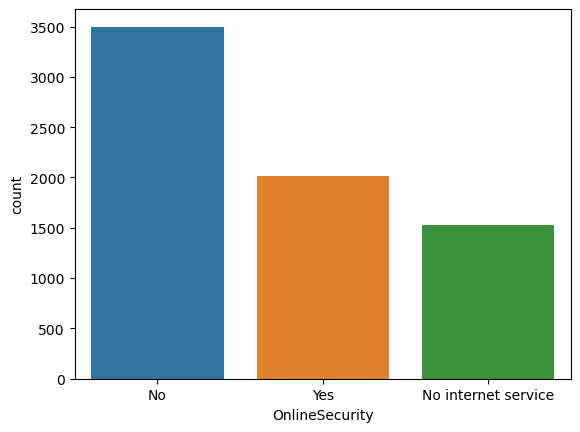

In [40]:
ax = sns.countplot (x = 'OnlineSecurity', data = df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

Total number of customer not using internet service is 1526 using onlineSecurity service is 2019 and not using onlinesecurity
is 3498

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


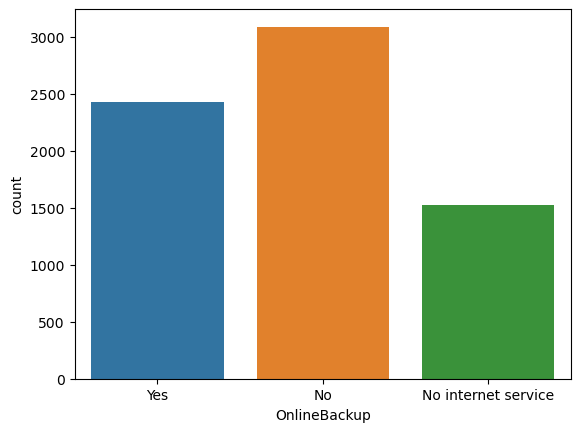

In [41]:
ax = sns.countplot (x = 'OnlineBackup', data = df_visualization_nominal)
print(df_visualization_nominal['OnlineBackup'].value_counts())

total number of customer not using internet service is 1526, using onlinebackup is 2429 and not using onlinebackup is 3088

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


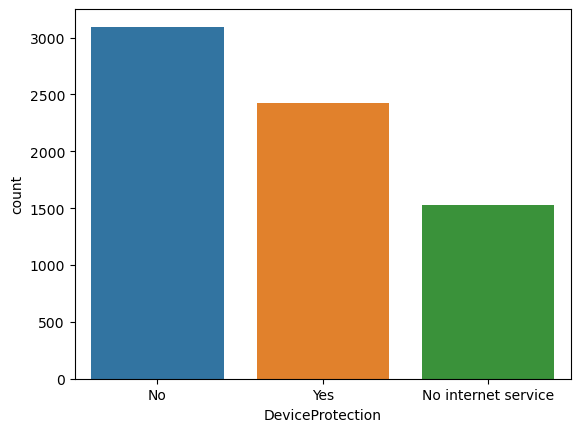

In [42]:
ax = sns.countplot (x = 'DeviceProtection', data = df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


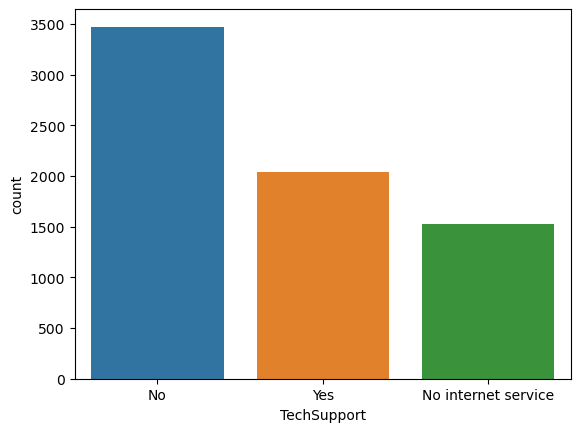

In [43]:
ax = sns.countplot (x = 'TechSupport', data = df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


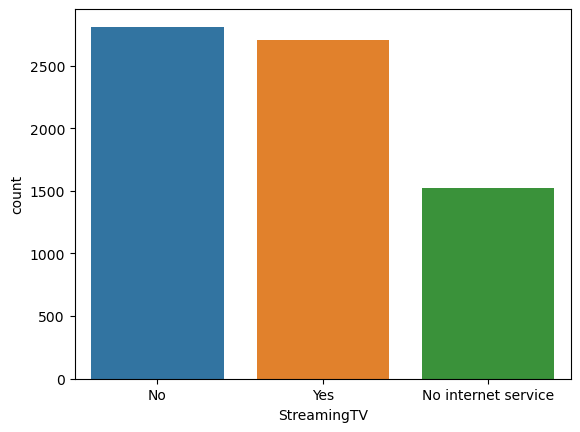

In [44]:
ax = sns.countplot (x = 'StreamingTV', data = df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


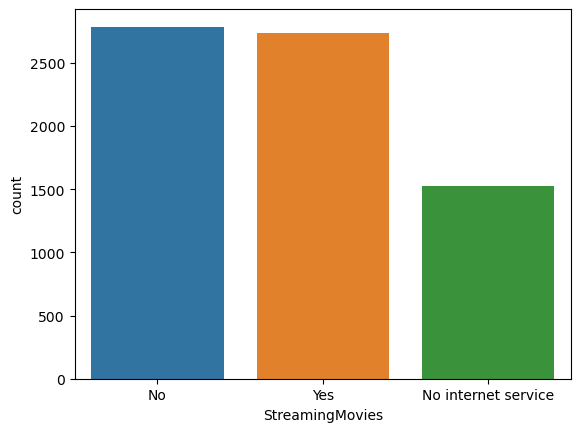

In [45]:
ax = sns.countplot (x = 'StreamingMovies', data = df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


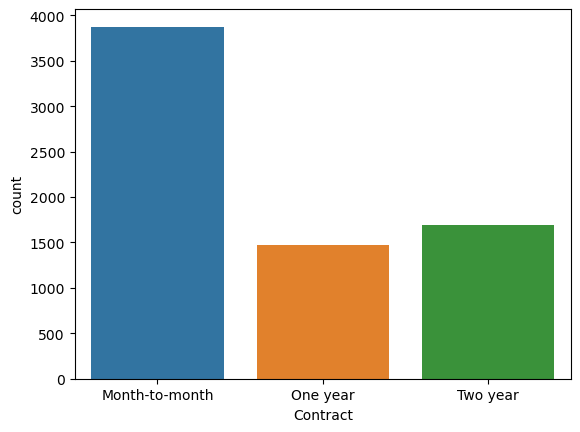

In [46]:
ax = sns.countplot (x = 'Contract', data = df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


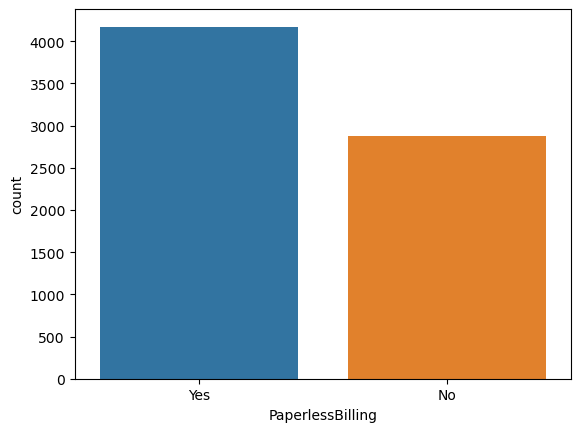

In [47]:
ax = sns.countplot (x = 'PaperlessBilling', data = df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


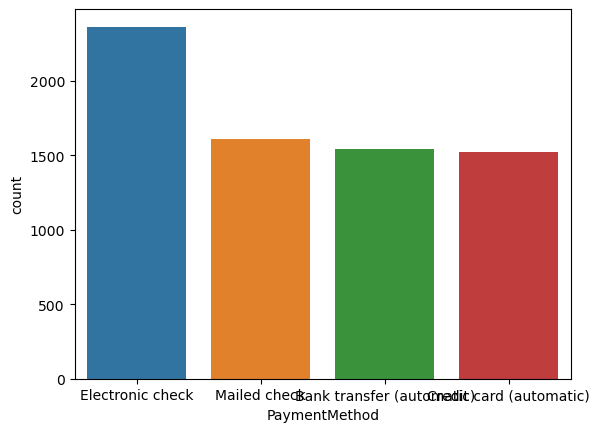

In [48]:
ax = sns.countplot (x = 'PaymentMethod', data = df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


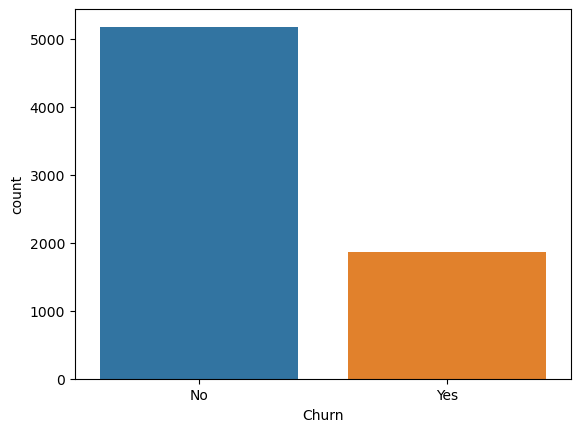

In [49]:
ax = sns.countplot (x = 'Churn', data = df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

Making DataFrame of the Ordinal Data :

In [50]:
df_visualization_ordinal = df[['customerID', 'tenure'].copy()]

In [51]:
df_visualization_ordinal.columns

Index(['customerID', 'tenure'], dtype='object')

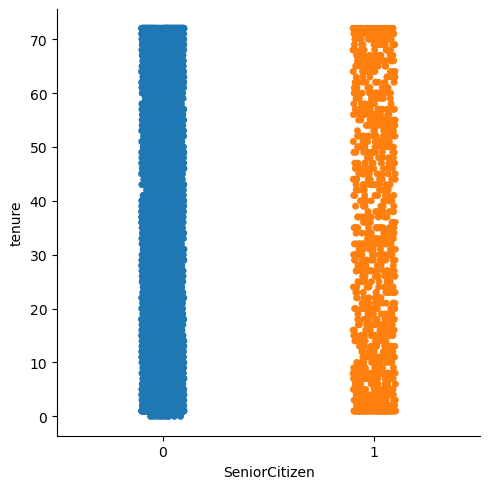

In [52]:
sns.catplot(x = 'SeniorCitizen', y = 'tenure', data = df)

Checking the Distribution of the continous value of the float type columns :

In [53]:
df_visualization_continous = df[['MonthlyCharges', 'TotalCharges'].copy()]

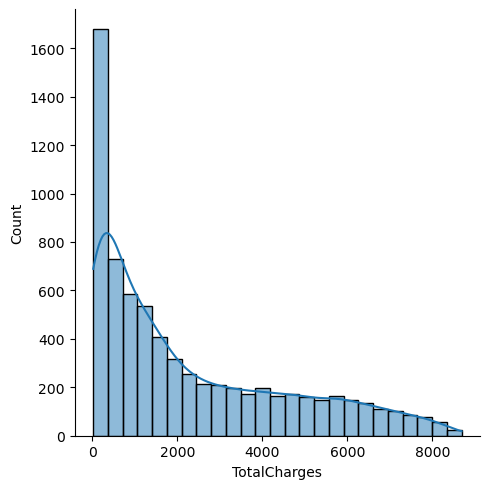

In [54]:
import seaborn as sns
sns.displot(df_visualization_continous['TotalCharges'], kde = True)

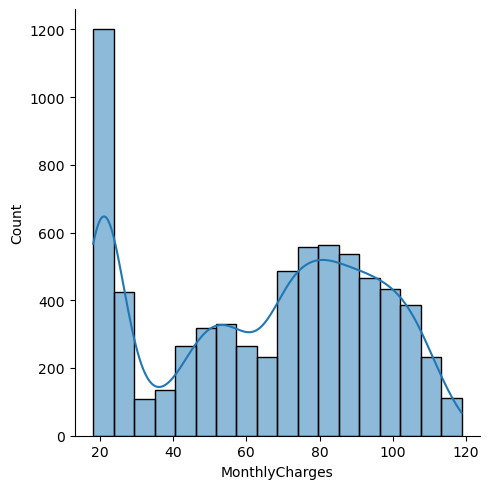

In [55]:
sns.displot(df_visualization_continous['MonthlyCharges'], kde = True)

Visualization Part is completed

Encoding of DataFrame :

The dataset has a lot of string value we will use the encoding technique to convert the string data to numerical one.

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

If our dtypes present in the 'object' then we will applied the encoding technique 

In [57]:
# using loop condition 

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [58]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [59]:
# Describe the dataset
# only use the continous value ...

df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


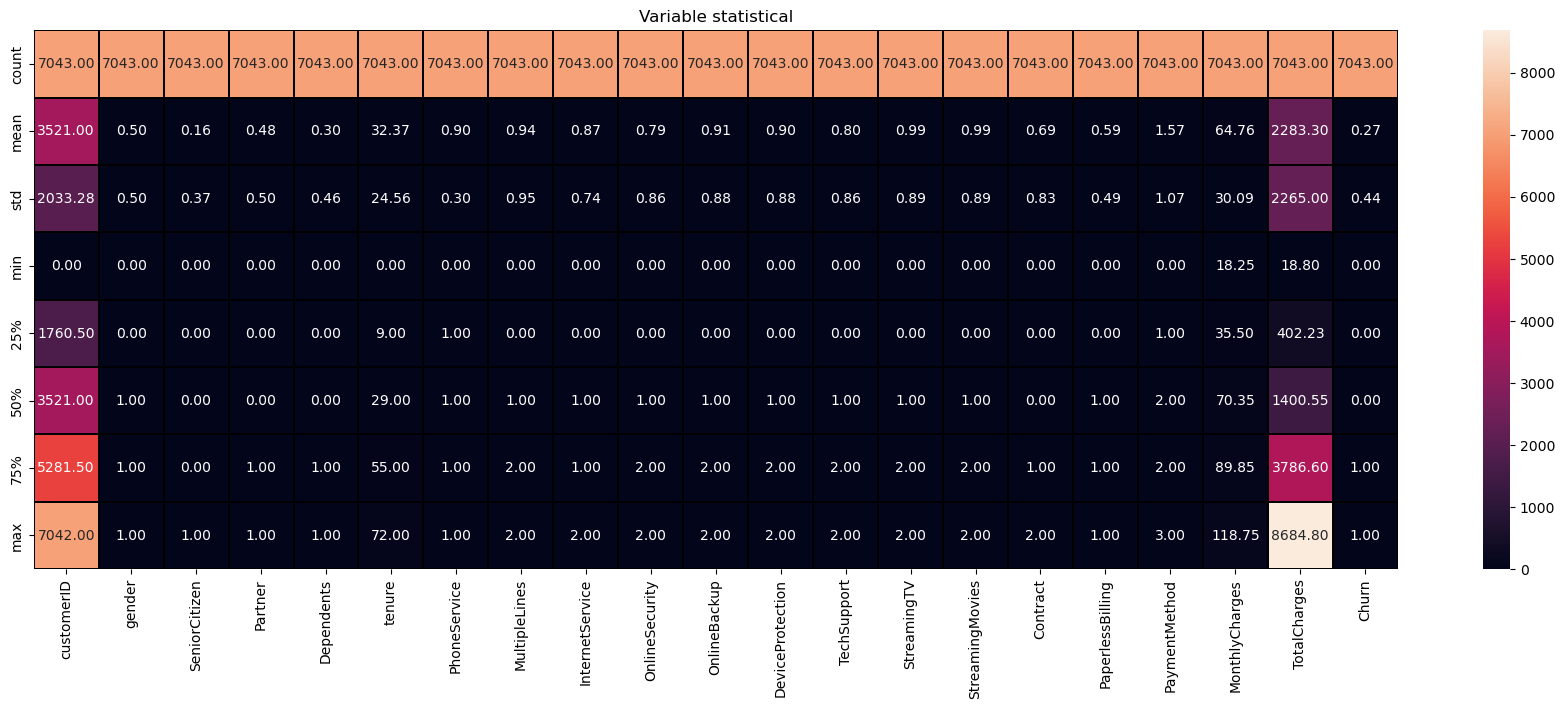

In [60]:
# using heatmap :

import matplotlib.pyplot as plt
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(), annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2f')
plt.title('Variable statistical')
plt.show()

In [61]:
# checking the correlation :

df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


In [62]:
# correlation of the columns with the target column :

df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

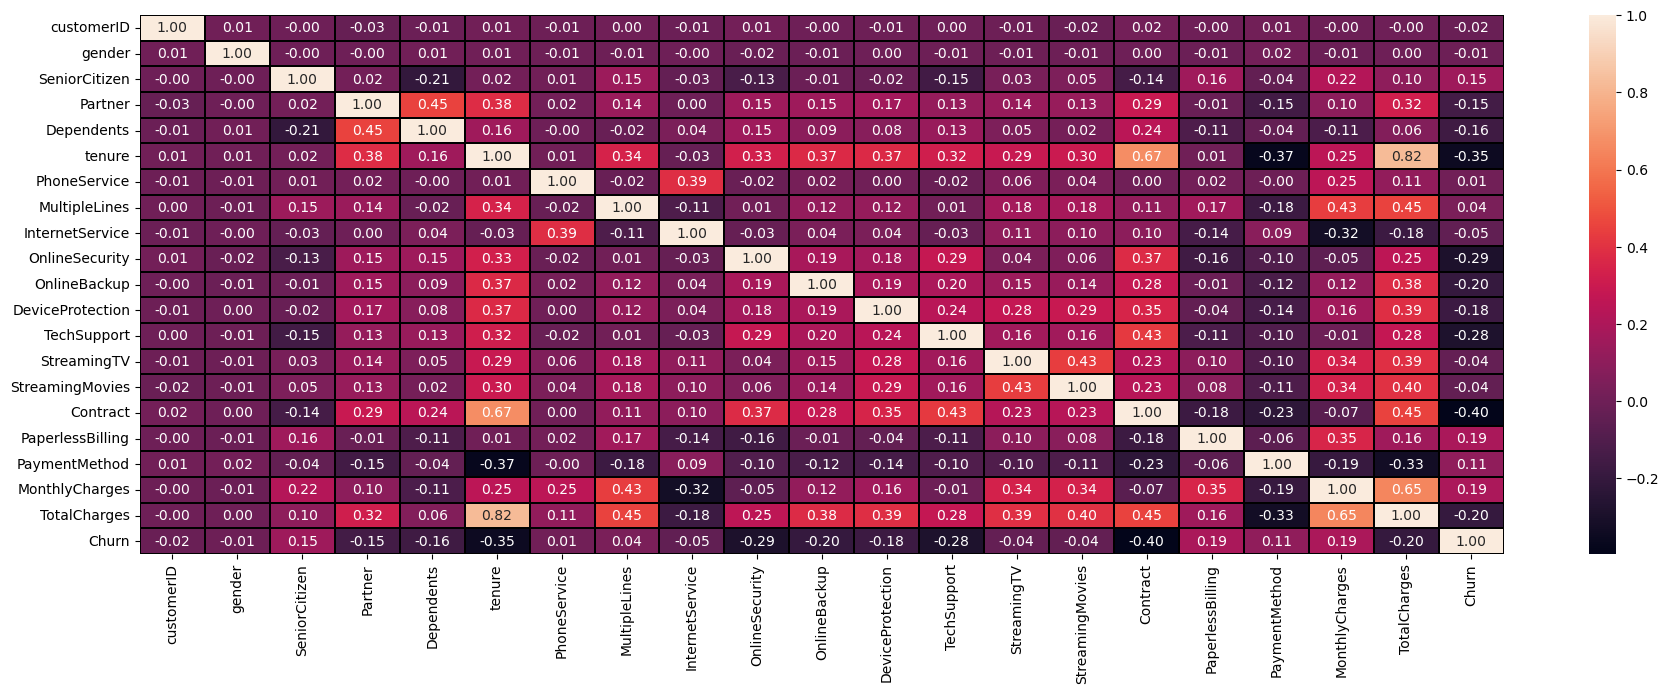

In [63]:
# using heatmap :

plt.figure(figsize = (22,7))
sns.heatmap(df.corr(), annot = True, linewidth = 0.1, linecolor = 'black', fmt = '0.2f')

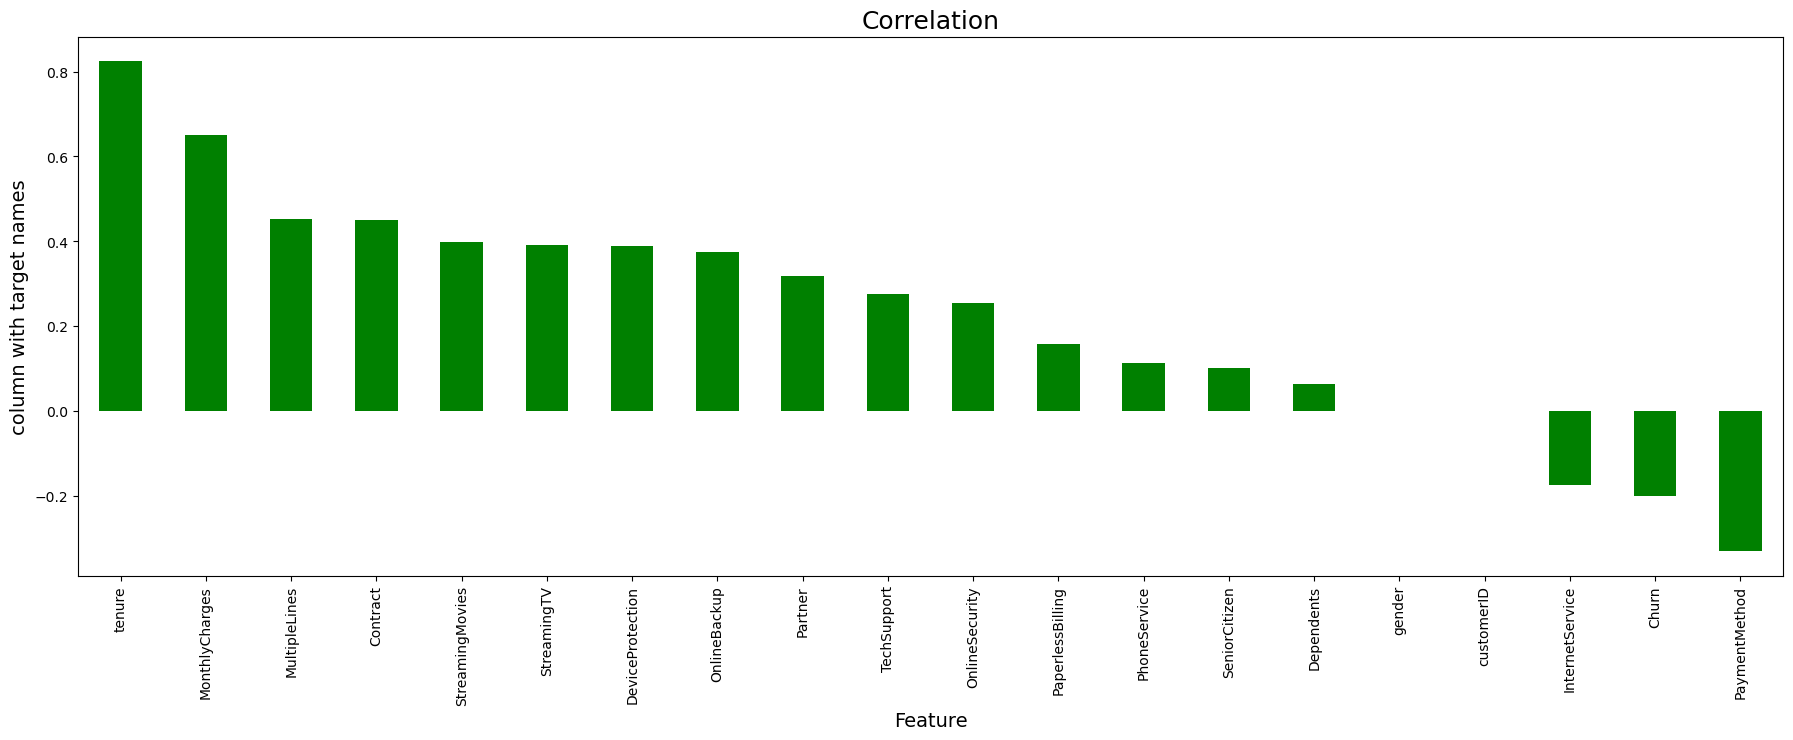

In [64]:
# Checking the columns which are positively and negatively correlated with the target columns:

plt.figure(figsize = (22,7))
df.corr()['TotalCharges'].sort_values(ascending = False).drop(['TotalCharges']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('column with target names', fontsize = 14)
plt.title('Correlation', fontsize = 18)
plt.show()

In [65]:
# Checking the Skewness...

df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

<AxesSubplot:>

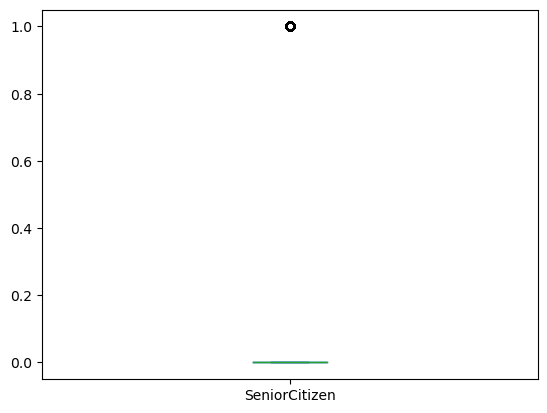

In [66]:
# Checking the outlier int and float type columns:

df['SeniorCitizen'].plot.box()

<AxesSubplot:>

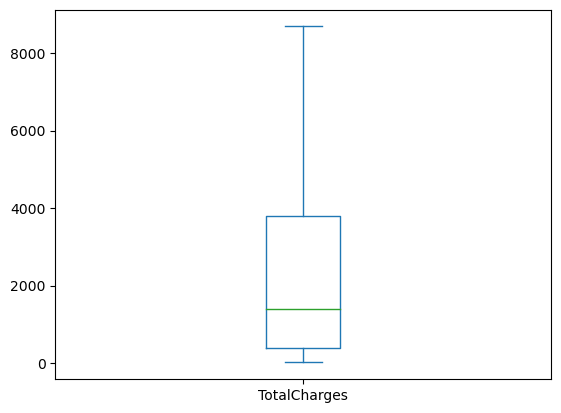

In [67]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

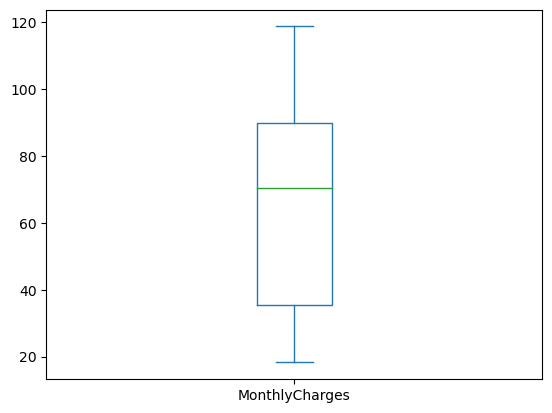

In [68]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

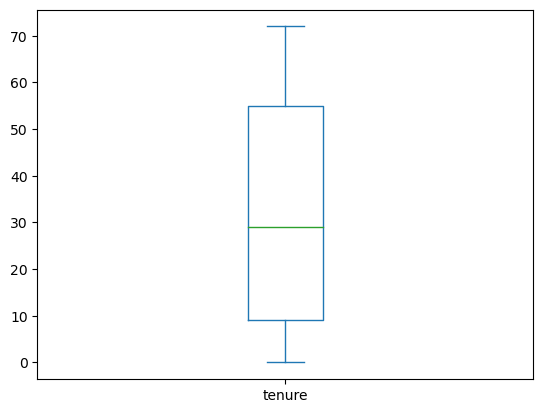

In [69]:
df['tenure'].plot.box()

In [70]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [71]:
df.shape

(7043, 21)

In [72]:
# Considering the data removal :
# Apply Z score method ....

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
thresholds = 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [73]:
df_new_z = df[(z<3). all(axis = 1)]

In [74]:
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [75]:
df_new_z.shape

(6361, 21)

In [76]:
# Percentage loss of data :

Data_loss = ((7043 - 6361) / 7043) *100

In [77]:
Data_loss

9.683373562402386

In [78]:
#Seperating the columns into features and target ...

features = df.drop('TotalCharges', axis = 1)
target = df['TotalCharges']

In [79]:
# Scalling the data using Min-Max Scaler :

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [80]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f'At random state {i}, the training accuracy is:-{r2_score(target_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is:-{r2_score(target_train,pred_train)}')
    print('\n')
          

At random state 0, the training accuracy is:-0.9058706722803965
At random state 0, the testing accuracy is:-0.9058706722803965


At random state 1, the training accuracy is:-0.9052277082152647
At random state 1, the testing accuracy is:-0.9052277082152647


At random state 2, the training accuracy is:-0.9056858398935238
At random state 2, the testing accuracy is:-0.9056858398935238


At random state 3, the training accuracy is:-0.9044956724241888
At random state 3, the testing accuracy is:-0.9044956724241888


At random state 4, the training accuracy is:-0.9031354749784841
At random state 4, the testing accuracy is:-0.9031354749784841


At random state 5, the training accuracy is:-0.9026338340566922
At random state 5, the testing accuracy is:-0.9026338340566922


At random state 6, the training accuracy is:-0.9028087364691222
At random state 6, the testing accuracy is:-0.9028087364691222


At random state 7, the training accuracy is:-0.9030731852162728
At random state 7, the testing ac

In [81]:
# divide the data :

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [82]:
# train the model :

lr.fit(features_train,target_train)
lr = LinearRegression()
pred_test = lr.predict(features_test)
print(r2_score(target_test,pred_test))

In [83]:
# cross- validation score :

train_accuracy = r2_score(target_train,pred_train)
test_accuracy = r2_score(target_test,pred_test)

In [86]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv=j)
    cv_mean = cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}')
    print("\n")
    

At cross fold 2 the cv score is 0.9033382537767014 and accuracy score for training is -0.8911218980191129 and accuracy for testing is -0.9349272599005327


At cross fold 3 the cv score is 0.9037012261875313 and accuracy score for training is -0.8911218980191129 and accuracy for testing is -0.9349272599005327


At cross fold 4 the cv score is 0.9037044584134895 and accuracy score for training is -0.8911218980191129 and accuracy for testing is -0.9349272599005327


At cross fold 5 the cv score is 0.9036665825623267 and accuracy score for training is -0.8911218980191129 and accuracy for testing is -0.9349272599005327


At cross fold 6 the cv score is 0.9037349024389357 and accuracy score for training is -0.8911218980191129 and accuracy for testing is -0.9349272599005327


At cross fold 7 the cv score is 0.9035677539347997 and accuracy score for training is -0.8911218980191129 and accuracy for testing is -0.9349272599005327


At cross fold 8 the cv score is 0.9035565941557734 and accuracy 

Here we have handled the problem of the overfitting and underfitting by checking the training and testing score

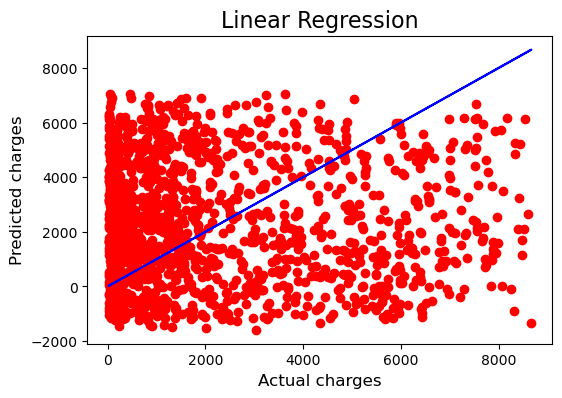

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
plt.scatter(x = target_test, y = pred_test, color = 'r')
plt.plot(target_test,target_test, color = 'b')
plt.xlabel('Actual charges', fontsize = 12)
plt.ylabel('Predicted charges' , fontsize = 12 )
plt.title('Linear Regression' , fontsize = 16)
plt.savefig('lr.png')
plt.show()

Regularization:

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [90]:
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1,10],
              'random_state' : list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [91]:
# final model training...

ls = Lasso(alpha=10, random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

90.37016705563438

Ensemble Technique :

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],
              'max_features':['auto','sqrt','log2']}

rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [93]:
rf = RandomForestRegressor(criterion = 'mse', max_features = 'auto')
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test, pred_decision)
print('R2 score' , rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('cross_val_score', rfc*100)

R2 score 99.88656327305003
cross_val_score 99.87251417373591


Now, we are getting model accuracy and cross validation :

In [97]:
import pickle
filename = 'Churn.pkl'
pickle.dump(rf,open(filename, 'wb'))

Conclusion:

In [99]:
loaded_model = pickle.load(open('Churn.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result*100)

99.88656327305003


In [100]:
conclusion = pd.DataFrame([loaded_model.predict(features_test)[:], pred_decision[:]], index = ['Predicted', 'Orginal'])

In [101]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
Predicted,893.5105,3007.2,1661.11,1658.9925,3682.8335,64.68,956.1485,504.3365,5451.3975,189.3965,...,4228.3605,7823.7465,2632.012,816.7795,567.844,406.4025,3121.0635,70.1025,1275.7865,520.9425
Orginal,893.5105,3007.2,1661.11,1658.9925,3682.8335,64.68,956.1485,504.3365,5451.3975,189.3965,...,4228.3605,7823.7465,2632.012,816.7795,567.844,406.4025,3121.0635,70.1025,1275.7865,520.9425
